## Installing and importing necessary libraries

In [136]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [137]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [138]:
import praw
import pandas as pd
import datetime as dt

## Creating a Reddit API instance and scraping the data using required keywords

In [139]:

# create a Reddit API instance. 
reddit = praw.Reddit(
    client_id='MyClient',
    client_secret='MySecret',
    username='MyUser',
    password='Mypassword',
    user_agent='My user agent analyzer'
)

# define subreddits and keywords to search for
subreddits = ['worldnews', 'climate','environment','ClimateActionPlan','climate_science','EcoNewsNetwork','news','nature','AskReddit','ClimateOffensive',
              'GlobalWarming','carbonoffset']


keywords = [['heat','heat warning','torrid heat','heatwave','sweltering heat','heatstroke','heat stroke', 'extreme temperature','endanger'],
            ['climate change','extreme temperatures', 'extreme temperature', 'global warming','change in climate','globalwarming'],
             ['greenhouse', 'emission', 'acidification','sea level rise','emergency','extinct','biosphere','famine', 'drought','flood'],
            ['emergency','tsunami','wildfires','ozone','scarcity','pollution','tsunamis','earthquake']
           ]

# define time range for posts (in days)
days = 600

# get timestamp for the start of the time range
start_time = int((dt.datetime.utcnow() - dt.timedelta(days=days)).timestamp())

# initialize a list to store the submissions
submissions = []

# loop through the subreddits and fetch submissions that match the keywords
for subreddit in subreddits:
    
    for i in range(0,len(keywords)):
        searchString = '('+' OR '.join(keywords[i]) + ')'
        for submission in reddit.subreddit(subreddit).search(searchString, limit=None):
            # check if submission is within the time range
            if submission.created_utc >= start_time:
                submissions.append(submission)

# print the number of submissions fetched
print(f"Fetched {len(submissions)} submissions")

# extract relevant information
data = {
"title": [submission.title for submission in submissions],
'selftext': [submission.selftext for submission in submissions],
"score": [submission.score for submission in submissions],
"subreddit": [submission.subreddit.display_name for submission in submissions],
"url": [submission.url for submission in submissions],
"created_utc": [submission.created_utc for submission in submissions]
}

df = pd.DataFrame(data)

# convert created_utc to datetime and set as index
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')



Fetched 3172 submissions


In [140]:
df.to_excel("submissions2.xlsx")

In [141]:
import numpy as np
import re #RegEx : Regular expression

## Creating a dataframe

In [142]:
reddit_df = pd.DataFrame(data)
print(reddit_df.head(10))
print(reddit_df.tail(10))

                                               title selftext  score  \
0  Spain braced for record April temperature of 3...             184   
1  Japan swelters in worst heatwave since 1875 - ...              64   
2  Millions swelter as UK endures its 1st extreme...              46   
3  Rare three year long La Niña which brought hur...             815   
4  Heatwave: Warnings of 'heat apocalypse' in France           15875   
5  A strong dome of heat develops into western Eu...            1215   
6  Humanity faces ‘collective suicide’ over clima...           62005   
7  National emergency declared after UK's first r...            6169   
8         The first Red Extreme heat warning issued.            1120   
9  Amber warning: Extreme heat forecast in United...             435   

   subreddit                                                url   created_utc  
0  worldnews  https://www.theguardian.com/world/2023/apr/27/...  1.682616e+09  
1  worldnews     https://www.bbc.co.uk/news/wor

In [143]:
reddit_df['created_utc'] = pd.to_datetime(reddit_df['created_utc'], unit='s')
reddit_df.tail(10)

,title,selftext,score,subreddit,url,created_utc
3162,Surprise! The Term ‘Carbon Footprint’ Was Coin...,,45,GlobalWarming,https://interestingengineering.com/carbon-foot...,2022-06-20 03:15:23
3163,Why does every single piece of information abo...,It pisses me off. The average consumer is a sm...,66,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,2022-04-20 18:08:46
3164,How global warming is affecting the Norwegian ...,So when talking about global warming in the Ar...,21,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,2022-11-08 21:21:45
3165,Can the USA's government reverse global warmin...,**(2021 data added on Sept 16)** Arctic sea ic...,34,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,2021-09-14 07:36:24
3166,To beat climate change and slow global warming...,Allow nature to take its toll. \nWe need to st...,13,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,2022-04-21 09:17:06
3167,If the Benthic filter removes 50-90% of methan...,I love watching Natural World Facts on YouTube...,2,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,2022-05-17 12:52:22
3168,Personal opinion on fighting global warming..,"So well, having seen the news. Documentaries a...",8,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,2021-10-30 21:39:30
3169,Good podcast that discusses how global warming...,Interesting podcast about what global warming ...,14,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,2022-04-13 13:34:20
3170,My -somewhat cruel- solution to climate change.,"Two words, nuclear winter.\n\nA nuclear winter...",0,GlobalWarming,https://www.reddit.com/r/GlobalWarming/comment...,2021-11-01 21:03:32
3171,Satellites detect no real climate benefit from...,,3,CarbonOffset,https://illuminem.com/illuminemvoices/970707e0...,2022-12-19 10:38:03


# Data cleaning and preprocessing

In [144]:
title_df = reddit_df.loc[:,['title']]
title_df.head(10)

,title
0,Spain braced for record April temperature of 3...
1,Japan swelters in worst heatwave since 1875 - ...
2,Millions swelter as UK endures its 1st extreme...
3,Rare three year long La Niña which brought hur...
4,Heatwave: Warnings of 'heat apocalypse' in France
5,A strong dome of heat develops into western Eu...
6,Humanity faces ‘collective suicide’ over clima...
7,National emergency declared after UK's first r...
8,The first Red Extreme heat warning issued.
9,Amber warning: Extreme heat forecast in United...


In [145]:
count = (title_df['title'] == "").sum()
print(count)

0


In [146]:
title_df.duplicated().sum()

472

In [147]:
title_df = title_df.drop_duplicates()
title_df.duplicated().sum()

0

In [148]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


## Removing urls and emojis from the dataframe

In [149]:
import re

# Define URL and emoji patterns
url_pattern = re.compile(r'https?://\S+|www\.\S+|http?://\S')
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

# Function to remove URLs and emojis from a string
def remove_urls_and_emojis(text):
    text = url_pattern.sub('', text)
    text = emoji_pattern.sub('', text)
    return text

# Apply the function to the 'title' column of the DataFrame
title_df['title'] = title_df['title'].apply(remove_urls_and_emojis)


In [150]:
import re

# Check for URLs in the 'title' column
has_urls = title_df['title'].str.contains(r'http\S+|www\.\S+')

# Check for emojis in the 'title' column
has_emojis = title_df['title'].str.contains('[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F1E0-\U0001F1FF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]', flags=re.UNICODE)

# Check if either of the above conditions are True
if has_urls.any() or has_emojis.any():
    print("The dataframe contains URLs and/or emojis.")
else:
    print("The dataframe does not contain URLs or emojis.")


The dataframe does not contain URLs or emojis.


In [151]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Training the data using LDA model and finding the top keywords

In [152]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [153]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/srichandanach09/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srichandanach09/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:
import pandas as pd
import numpy as np
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Load the pre-trained spacy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# function to preprocess text
def preprocess_text(text):
    # Remove URLs and emojis
    url_pattern = re.compile(r'https?://\S+|www\.\S+|http?://\S')
    text = url_pattern.sub(r'', text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    # Lemmatize text
    doc = nlp(text)
    lemmas = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.like_num:
            lemmas.append(token.lemma_)
    return ' '.join(lemmas)

# Preprocess the title column
title_df['clean_title'] = title_df['title'].apply(preprocess_text)

# Create a count vectorizer object
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10, # minimum reqd occurences of a word 
                             stop_words='english', # remove stop words
                             lowercase=True, # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}') # num chars > 3

# Create a term document matrix
doc_term_matrix = vectorizer.fit_transform(title_df['clean_title'])

# Create an LDA object with 10 topics
lda = LDA(n_components=10, random_state=42)



# Fit the LDA model on the document term matrix
lda.fit(doc_term_matrix)

# Print the top words for each cluster
topics = lda.components_
vocab = vectorizer.get_feature_names()
for i, topic_dist in enumerate(topics):
    topic_words = [(word, topic_dist[i]) for i, word in enumerate(vocab)]
    topic_words.sort(key=lambda x: x[1], reverse=True)
    top_words = [word for word, prob in topic_words[:10]]
    print(f"Topic {i}: {' '.join(top_words)}")

# Get the topic distribution for each document
doc_topic_dist = lda.transform(doc_term_matrix)

# Assign topic labels to each document based on the highest probability topic
topic_labels = []
for i in range(len(title_df)):
    topic_labels.append(np.argmax(doc_topic_dist[i]))

# Add the topic labels to the dataframe
title_df['topic_label'] = topic_labels

# Define a function to label the topics
def label_topics(row):
    if row['topic_label'] == 0:
        return 'Topic 0: Ocean/Sea level'
    elif row['topic_label'] == 1:
        return 'Topic 1: Heatwaves and emergency'
    elif row['topic_label'] == 2:
        return 'Topic 2: Extreme temperatures'
    elif row['topic_label'] == 3:
        return 'Topic 3: Globalwarming - relevant research'
    elif row['topic_label'] == 4:
        return 'Topic 4: Relief and help'
    elif row['topic_label'] == 5:
        return 'Topic 5: Alerts and news'
    elif row['topic_label'] == 6:
        return 'Topic 6: Warnings'
    elif row['topic_label'] == 7:
        return 'Topic 7: Natural Disasters'
    elif row['topic_label'] == 8:
        return 'Topic 8: Human activities - climate impact'
    else:
        return 'Topic 9: Government laws, urban life'
    
#Apply the label_topics function to each row
title_df['topic'] = title_df.apply(lambda row: label_topics(row), axis=1)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 0: level sea rise ice ozone study earth new year global
Topic 1: heat temperature record wave extreme summer year warm degree ocean
Topic 2: pollution tsunami air earthquake plastic new magnitude hit gas like
Topic 3: climate water risk change future say look heat face government
Topic 4: climate change global warming year scientist action crisis fight people
Topic 5: extreme heat weather heatwave warning event wildfire world drought france
Topic 6: wildfire california endangered help endanger national forest save river burn
Topic 7: level rise sea report water low emission reduce year pollution
Topic 8: emergency heat state high temperature declare impact set die people
Topic 9: climate heat big carbon fuel plant city power emission change


In [185]:
title_df.columns
title_df.head(50)

,title,clean_title,topic_label,topic
0,Spain braced for record April temperature of 3...,Spain brace record April temperature 39c extre...,1,Topic 1: Heatwaves and emergency
1,Japan swelters in worst heatwave since 1875 - ...,Japan swelter bad heatwave blister heat draw o...,5,Topic 5: Alerts and news
2,Millions swelter as UK endures its 1st extreme...,million swelter UK endure extreme heat warning,5,Topic 5: Alerts and news
3,Rare three year long La Niña which brought hur...,rare year long La Niña bring hurricane floodin...,1,Topic 1: Heatwaves and emergency
4,Heatwave: Warnings of 'heat apocalypse' in France,heatwave warning heat apocalypse France,5,Topic 5: Alerts and news
5,A strong dome of heat develops into western Eu...,strong dome heat develop western Europe week l...,5,Topic 5: Alerts and news
6,Humanity faces ‘collective suicide’ over clima...,humanity face collective suicide climate crisi...,3,Topic 3: Globalwarming - relevant research
7,National emergency declared after UK's first r...,national emergency declare UK red extreme heat...,5,Topic 5: Alerts and news
8,The first Red Extreme heat warning issued.,Red Extreme heat warning issue,5,Topic 5: Alerts and news
9,Amber warning: Extreme heat forecast in United...,Amber warning extreme heat forecast United Kin...,5,Topic 5: Alerts and news


In [155]:
#Print the first 10 rows of the dataframe with the topic labels
print(title_df[['title', 'topic']].head(10))

# Print the topic label count only
print('\n Label             Count')
print(title_df['topic'].value_counts())

print('\n')
print(title_df['topic'].unique())


                                               title  \
0  Spain braced for record April temperature of 3...   
1  Japan swelters in worst heatwave since 1875 - ...   
2  Millions swelter as UK endures its 1st extreme...   
3  Rare three year long La Niña which brought hur...   
4  Heatwave: Warnings of 'heat apocalypse' in France   
5  A strong dome of heat develops into western Eu...   
6  Humanity faces ‘collective suicide’ over clima...   
7  National emergency declared after UK's first r...   
8         The first Red Extreme heat warning issued.   
9  Amber warning: Extreme heat forecast in United...   

                                        topic  
0            Topic 1: Heatwaves and emergency  
1                    Topic 5: Alerts and news  
2                    Topic 5: Alerts and news  
3            Topic 1: Heatwaves and emergency  
4                    Topic 5: Alerts and news  
5                    Topic 5: Alerts and news  
6  Topic 3: Globalwarming - relevant research  

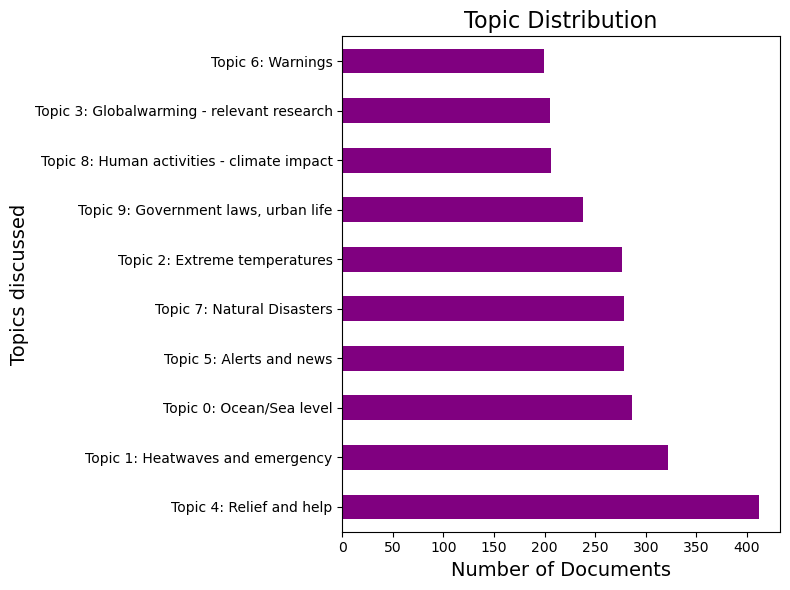

In [156]:
import matplotlib.pyplot as plt

# Get the counts for each topic label
topic_counts = title_df['topic'].value_counts()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8,6))
topic_counts.plot(kind='barh', ax=ax, color='purple')
ax.set_title('Topic Distribution', fontsize=16)
ax.set_xlabel('Number of Documents', fontsize=14)
ax.set_ylabel('Topics discussed', fontsize=14)
plt.tight_layout()
plt.show()


In [157]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


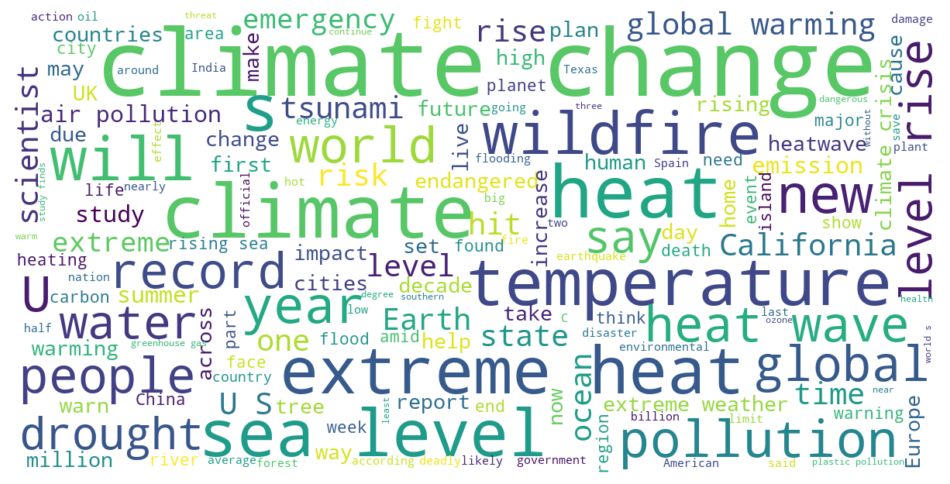

In [158]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the titles into one string
all_titles = ' '.join(title_df['title'])

# Generate wordcloud
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40, scale=3,
                      random_state=42).generate(all_titles)

# Plot the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


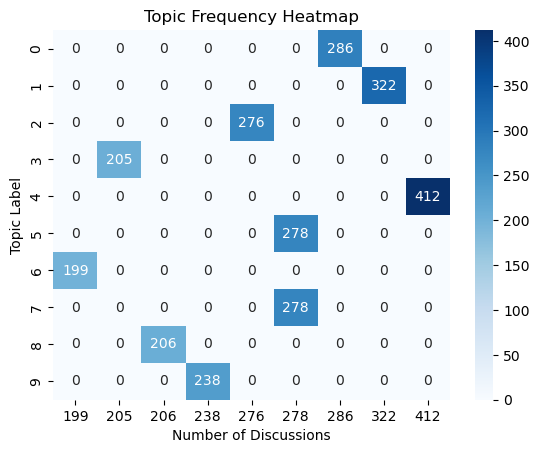

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of discussions per topic
topic_counts = title_df.groupby('topic_label').count()['title']

# Reshape the data for plotting
topic_counts = topic_counts.reset_index(name='count')
topic_counts = topic_counts.pivot(index='topic_label', columns='count', values='count').fillna(0)

# Create the heatmap
sns.heatmap(topic_counts, cmap='Blues', annot=True, fmt='g')

# Add labels
plt.xlabel('Number of Discussions')
plt.ylabel('Topic Label')
plt.title('Topic Frequency Heatmap')

# Show the plot
plt.show()
